# What is topic-modelling?
In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents. Topic modeling is a frequently used text-mining tool for discovery of hidden semantic structures in a text body. Intuitively, given that a document is about a particular topic, one would expect particular words to appear in the document more or less frequently: "dog" and "bone" will appear more often in documents about dogs, "cat" and "meow" will appear in documents about cats, and "the" and "is" will appear equally in both. A document typically concerns multiple topics in different proportions; thus, in a document that is 10% about cats and 90% about dogs, there would probably be about 9 times more dog words than cat words.

The "topics" produced by topic modeling techniques are clusters of similar words. A topic model captures this intuition in a mathematical framework, which allows examining a set of documents and discovering, based on the statistics of the words in each, what the topics might be and what each document's balance of topics is. It involves various techniques of dimensionality reduction(mostly non-linear) and unsupervised learning like LDA, SVD, autoencoders etc.

In [1]:
import gensim
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
df = pd.read_csv(r"..\data files\Pubmed5k_processed.csv", index_col="ArticleID")
df

,Title,Abstract,Abstract_processed,words_count
ArticleID,,,,
34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...,"['coordination', 'variability', 'coordination'...",1421
34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...,"['clinical', 'scenario', 'dynamic', 'knee', 'v...",1941
34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...,"['methodology', 'reported', 'ass', 'real', 'wo...",1821
34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...,"['outcome', 'acute', 'ischemic', 'stroke', 'ac...",2358
34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...,"['hearing', 'loss', 'child', 'result', 'develo...",1339
...,...,...,...,...
34444567,Mind the Differences: How Diagnoses and Hospit...,Integrated care pathway (ICP) is a prevailing ...,"['integrated', 'care', 'pathway', 'integrated'...",1456
34444568,The Ethics of Dying: Deciphering Pandemic-Resu...,The objective of medicine is to provide humans...,"['objective', 'medicine', 'provide', 'human', ...",1286
34444569,Research on Adolescents Regarding the Indirect...,This research involved the participation of 30...,"['research', 'involved', 'participation', 'chi...",850


In [3]:
# Create Corpus
texts = [df['Abstract_processed']]

# Create Dictionary
id2word = gensim.corpora.Dictionary(documents=texts)

# Term Document Frequency
corpus = [id2word.doc2bow(txt) for txt in texts]

In [4]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=7)
        model_list.append(model)
        coherencemodel = gensim.models.CoherenceModel(model=model, texts=texts, dictionary=dictionary)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:26<00:00,  4.90s/it]

Num Topics = 1  has Coherence Value of 0.7902
Num Topics = 2  has Coherence Value of 0.8192
Num Topics = 3  has Coherence Value of 0.8112
Num Topics = 4  has Coherence Value of 0.7918
Num Topics = 5  has Coherence Value of 0.7834
Num Topics = 6  has Coherence Value of 0.7884
Num Topics = 7  has Coherence Value of 0.7937
Num Topics = 8  has Coherence Value of 0.7919
Num Topics = 9  has Coherence Value of 0.7873
Num Topics = 10  has Coherence Value of 0.793
Num Topics = 11  has Coherence Value of 0.7918
Num Topics = 12  has Coherence Value of 0.7837
Num Topics = 13  has Coherence Value of 0.783
Num Topics = 14  has Coherence Value of 0.7903
Num Topics = 15  has Coherence Value of 0.7837
Num Topics = 16  has Coherence Value of 0.7897
Num Topics = 17  has Coherence Value of 0.7961
Num Topics = 18  has Coherence Value of 0.7926
Num Topics = 19  has Coherence Value of 0.7913
Num Topics = 20  has Coherence Value of 0.7902
Num Topics = 21  has Coherence Value of 0.7958
Num Topics = 22  has Coh

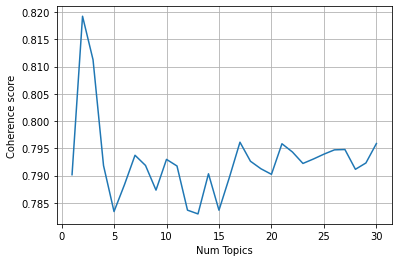

In [9]:
# Can take a long time to run.

start=1; limit=31; step=1;
x = range(start, limit, step)

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, 
                                                        start=start, limit=limit, step=step)
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [02:26<00:00,  5.05s/it]

Num Topics = 2  has Coherence Value of 0.8192
Num Topics = 3  has Coherence Value of 0.8112
Num Topics = 4  has Coherence Value of 0.7918
Num Topics = 5  has Coherence Value of 0.7834
Num Topics = 6  has Coherence Value of 0.7884
Num Topics = 7  has Coherence Value of 0.7937
Num Topics = 8  has Coherence Value of 0.7919
Num Topics = 9  has Coherence Value of 0.7873
Num Topics = 10  has Coherence Value of 0.793
Num Topics = 11  has Coherence Value of 0.7918
Num Topics = 12  has Coherence Value of 0.7837
Num Topics = 13  has Coherence Value of 0.783
Num Topics = 14  has Coherence Value of 0.7903
Num Topics = 15  has Coherence Value of 0.7837
Num Topics = 16  has Coherence Value of 0.7897
Num Topics = 17  has Coherence Value of 0.7961
Num Topics = 18  has Coherence Value of 0.7926
Num Topics = 19  has Coherence Value of 0.7913
Num Topics = 20  has Coherence Value of 0.7902
Num Topics = 21  has Coherence Value of 0.7958
Num Topics = 22  has Coherence Value of 0.7943
Num Topics = 23  has Co

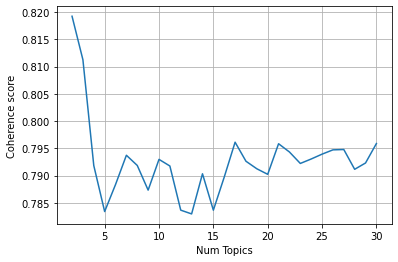

In [11]:
# Can take a long time to run.

start=2; limit=31; step=1;
x = range(start, limit, step)

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, 
                                                        start=start, limit=limit, step=step)
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
    
# Show graph
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.grid()
plt.show()

from the figure above best number of topics is 2, but i'm affraid that this value is a fake, or some misleading, it's improbable that 5000 doc speak about just 2 topics, also most scripts i saw select 10 or 20, in case 2 is the best so i get the second best value, and in case of misleading so i less prone to that propability so i will try the second highest value which is 17

In [10]:
num_topics = 17

In [13]:
# Select the model and print the topics
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=7)
model_topics = lda_model.show_topics(formatted=False)
# pprint(lda_model.print_topics(num_words=10))

In [18]:
# Visualize the topics-keywords
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda_model, corpus, id2word)
vis

AttributeError: 'Dictionary' object has no attribute 'get_feature_names'

In [24]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

C:\Users\huzyfa\AppData\Local\Temp\ipykernel_10436\3861351028.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,15,0.9998,"['cavernous', 'sinus', 'thrombosis', 'cavernou...","ArticleID 34153941 ['coordination', 'variab..."


In [25]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,15,0.9998,"['cavernous', 'sinus', 'thrombosis', 'cavernou...","ArticleID 34153941 ['coordination', 'variab..."


In [26]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,15.0,"['cavernous', 'sinus', 'thrombosis', 'cavernou...",NaN,NaN
15,NaN,NaN,1.0,1.0


In [29]:
df.drop(df[df.words_count<(num_topics*1.3)].index, inplace=True, axis=0)

## gensim implementation of LDA

In [30]:
vocab = gensim.corpora.Dictionary(documents=texts)

In [31]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary(bow)
doc_term_matrix = [vocab.doc2bow(i) for i in texts]
doc_term_matrix

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [33]:
# initializing LDA-model object
LDA = gensim.models.ldamodel.LdaModel

# Training LDA model on the document term matrix.
lda = LDA(corpus=doc_term_matrix, num_topics=num_topics, id2word = vocab, random_state=7, eval_every=None)

# Prints the topics
lda.print_topics()

[(0,
  '0.000*"[\'clinical\', \'practice\', \'guideline\', \'clinical\', \'practice\', \'guideline\', \'synthesise\', \'latest\', \'evidence\', \'support\', \'clinical\', \'patient\', \'decision\', \'making\', \'cpg\', \'adherent\', \'care\', \'associated\', \'improved\', \'patient\', \'survival\', \'outcome\', \'adherence\', \'rate\', \'low\', \'cancer\', \'stream\', \'australia\', \'greater\', \'understanding\', \'specific\', \'barrier\', \'cancer\', \'treatment\', \'cpg\', \'adherence\', \'warranted\', \'inform\', \'future\', \'implementation\', \'strategy\', \'paper\', \'present\', \'protocol\', \'systematic\', \'review\', \'aim\', \'determine\', \'cancer\', \'treatment\', \'cpg\', \'adherence\', \'rate\', \'australia\', \'variety\', \'common\', \'cancer\', \'identify\', \'factor\', \'associated\', \'adherence\', \'clinical\', \'practice\', \'guideline\', \'association\', \'cpg\', \'adherence\', \'patient\', \'outcome\', \'database\', \'searched\', \'ovid\', \'medline\', \'psychinf

In [82]:
print(lda.print_topics(num_topics=3, num_words=1))

# num_topics mean: how many topics want to extract 
# num_words: the number of words that want per topic

[(6, '0.013*"tumor" + 0.013*"cell" + 0.012*"sars" + 0.012*"cov" + 0.009*"protein"'), (5, '0.008*"cell" + 0.008*"group" + 0.008*"drug" + 0.007*"specie" + 0.007*"protein"'), (3, '0.009*"virus" + 0.008*"study" + 0.006*"analysis" + 0.005*"method" + 0.005*"human"')]


## scikit-learn implementation of LDA

In [38]:
# Creating a vectorizer
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform([" ".join(w) for w in texts])

lda = LatentDirichletAllocation(n_components=num_topics, learning_method="online", random_state=7)
x = lda.fit_transform(data_vectorized)

In [39]:
vectorizer.get_feature_names_out()

array(['aa', 'aaa', 'aachen', ..., 'área', 'åsberg', 'île'], dtype=object)

In [40]:
# x.get_feature
x.shape

(1, 17)

In [41]:
len(lda.components_.T), lda.components_.T[0]

(30893,
 array([ 0.34353127,  0.24901712, 10.2019804 ,  0.28807054,  0.26329114,
         0.27471461,  0.28294012,  0.25611604,  0.26030772,  0.26778385,
         0.28648216,  0.29631335,  0.28338255,  0.25298564,  0.24749713,
         0.30207384,  0.31136011]))

In [42]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [43]:
# Keywords for topics clustered by Latent Dirichlet Allocation
print("LDA Model:")
selected_topics(lda, vectorizer)

LDA Model:
Topic 0:


C:\Users\huzyfa\anaconda3\envs\mp\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('patient', 27.048985341212983), ('study', 21.794531262315136), ('cell', 14.278147109596278), ('health', 12.214573799004594), ('disease', 12.073793678229455), ('data', 11.759726151419876), ('based', 9.91928330797833), ('associated', 9.893281881377538), ('group', 9.747075579235505), ('analysis', 9.716673763152512)]
Topic 1:
[('patient', 11.440911132431848), ('study', 9.50566671152434), ('health', 7.451463327422172), ('disease', 6.767205318204566), ('group', 6.182681442320254), ('treatment', 5.4611002223956415), ('cell', 5.255862648175523), ('data', 5.192848201674939), ('year', 4.9926151716690175), ('analysis', 4.9124561882889495)]
Topic 2:
[('study', 4358.971510115841), ('patient', 4261.30143299721), ('disease', 2369.978002418055), ('health', 2257.1587629828487), ('cell', 2158.4894958901295), ('group', 2052.934631946131), ('analysis', 1902.934669191389), ('data', 1823.1973954641828), ('based', 1633.6756159956728), ('treatment', 1602.0275201255897)]
Topic 3:
[('patient', 17.862751584661

#### suggestions for improving this solution:-
- add bigram & trigram 
- use transformer based models
- use Hierarchical Drichlet Process(HDP) MODEL to find the best number of topics

### This script written at April-2022 by Ahmad salama
- salama4ai@gmail.com
- www.linkedin.com/in/salama4ai